<a href="https://www.kaggle.com/code/surekhaberlin/iris-species-machine-learning?scriptVersionId=189667444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# STEP 0: Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.display import Image

url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"
Image(url=url)

# STEP 1: Reading the data Iris.csv

In [5]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.rename(index=df.Id, inplace=True)
df.drop("Id", axis=1, inplace=True)

# STEP 2: Data Understanding

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.shape

(150, 5)

There is 150 rows and 5 columns

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

# STEP 3: Data Preparation

Need to perform the following steps to clean this data.

1. Checking for duplicates and removing it
2. Checking for null values and removing it
3. Dropping irrelevant rows and columns

Checking for duplicates

In [12]:
df.duplicated().sum()

3

Found 3 duplicates

In [13]:
#df = df.drop_duplicates()

Removed the duplicates

Checking for null values

In [14]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values so nothing to remove 

In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# STEP 4: Data Modelling

1. Renaming columns
2. Feature Creation
3. Finding the outlier

In [16]:
df.rename({"SepalLengthCm":"sepal_length",
            "SepalWidthCm":"sepal_width",
            "PetalLengthCm":"petal_length",
            "PetalWidthCm":"petal_width",
            "Species":"species"}, axis=1, inplace=True)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
df.sepal_length.value_counts().sum()

150

In [20]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Finding the Outlier

* Boxplot
A boxplot, also known as a box-and-whisker plot, provides a visual summary of the distribution of a dataset. It displays several descriptive statistics such as the median, quartiles, and potential outliers.


Box plot showing outliers

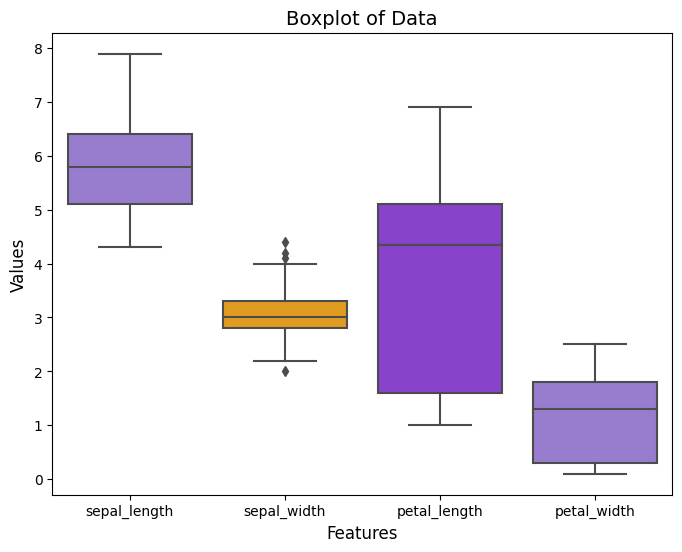

In [23]:
# Defining a custom palette with shades of purple
custom_palette = ['#9370DB', '#FFA500', '#8A2BE2']

# Creating the  box plot with custom colors
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette=custom_palette)
plt.title('Boxplot of Data', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

We can see that there are some outliers for sepal_width so we need to remove the outliers 

In [24]:
# Step 1: Calculating the Quartiles and IQR
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Defining the Outlier Fences
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

print("Upper Fence:", upper_fence)
print("Lower Fence:", lower_fence)

# Step 3: Identifying and Remove Outliers
outliers = df[(df['sepal_width'] < lower_fence) | (df['sepal_width'] > upper_fence)]
df= df[(df['sepal_width'] >= lower_fence) & (df['sepal_width'] <= upper_fence)]

print("\nIdentified outliers:")
print(outliers)



Upper Fence: 4.05
Lower Fence: 2.05

Identified outliers:
    sepal_length  sepal_width  petal_length  petal_width          species
16           5.7          4.4           1.5          0.4      Iris-setosa
33           5.2          4.1           1.5          0.1      Iris-setosa
34           5.5          4.2           1.4          0.2      Iris-setosa
61           5.0          2.0           3.5          1.0  Iris-versicolor


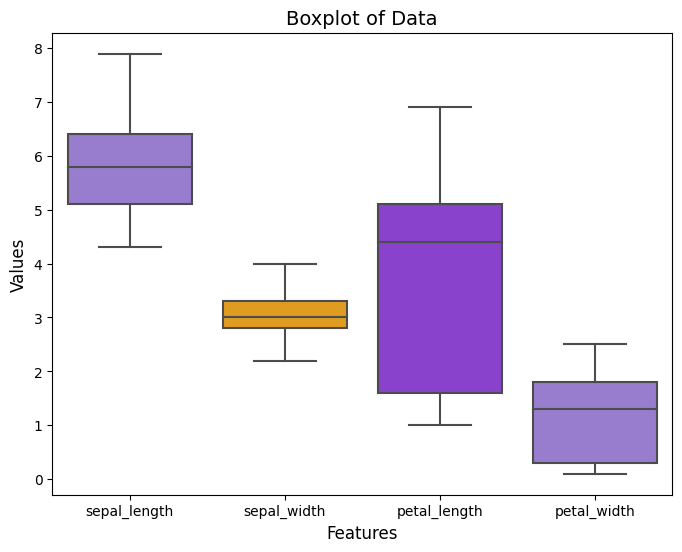

In [25]:
# Defining a custom palette with shades of purple
custom_palette = ['#9370DB', '#FFA500', '#8A2BE2']

# Creating the  box plot with custom colors
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette=custom_palette)
plt.title('Boxplot of Data', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [27]:
df['species'].value_counts()

species
2    50
1    49
0    47
Name: count, dtype: int64

# STEP 5: Exploratory Data Analysis

UNIVARIATE ANALYSIS

1. Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

2. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Observations

1. Most sepal length has length in range (5.2-6.3)cm
2. Most Sepal width has range (2.9-3.1)cm
3. Most petal length has length in range (1-1.5 and 5)cm
4. Most petal width has range (0-0.25 and 1.2-1.5)cmNumerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

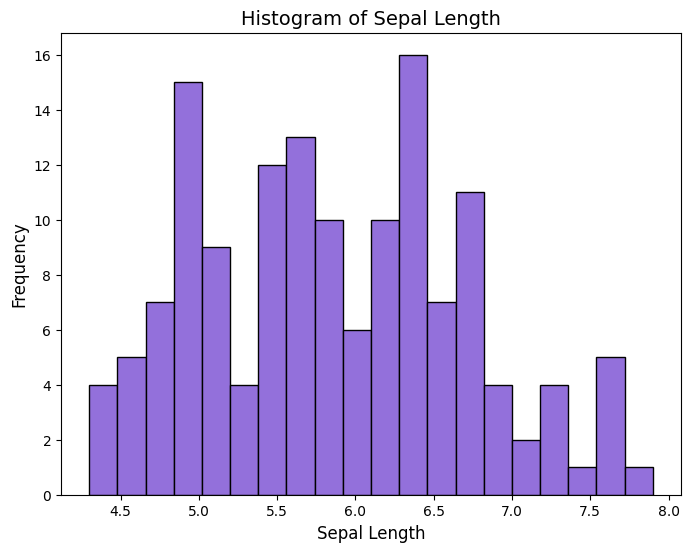

In [28]:
# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B']  # Purple shades

plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=20, color=custom_palette[0], edgecolor='black')
plt.title('Histogram of Sepal Length', fontsize=14)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

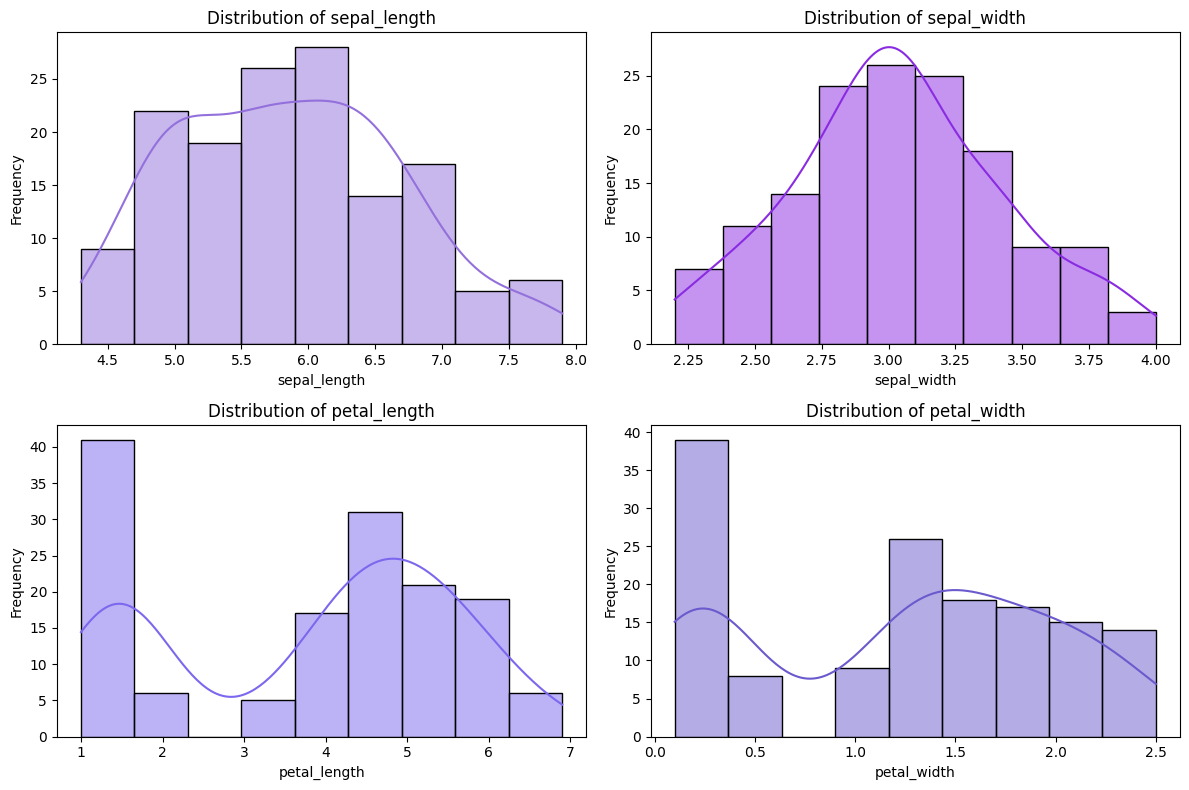

In [29]:
# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B']  # Shades of purple

plt.figure(figsize=(12, 8))
n_features = len(df.columns[:-1])
n_rows = n_features // 2 + n_features % 2  # Calculate the number of rows needed

for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(n_rows, 2, i+1)  # Adjust subplot layout dynamically
    sns.histplot(df[feature], kde=True, color=custom_palette[i % len(custom_palette)])
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()


Observations

1. Most sepal length has length in range (5.2-6.3)cm
2. Most Sepal width has range (2.9-3.1)cm
3. Most petal length has length in range (1-1.5 and 5)cm
4. Most petal width has range (0-0.25 and 1.2-1.5)cm

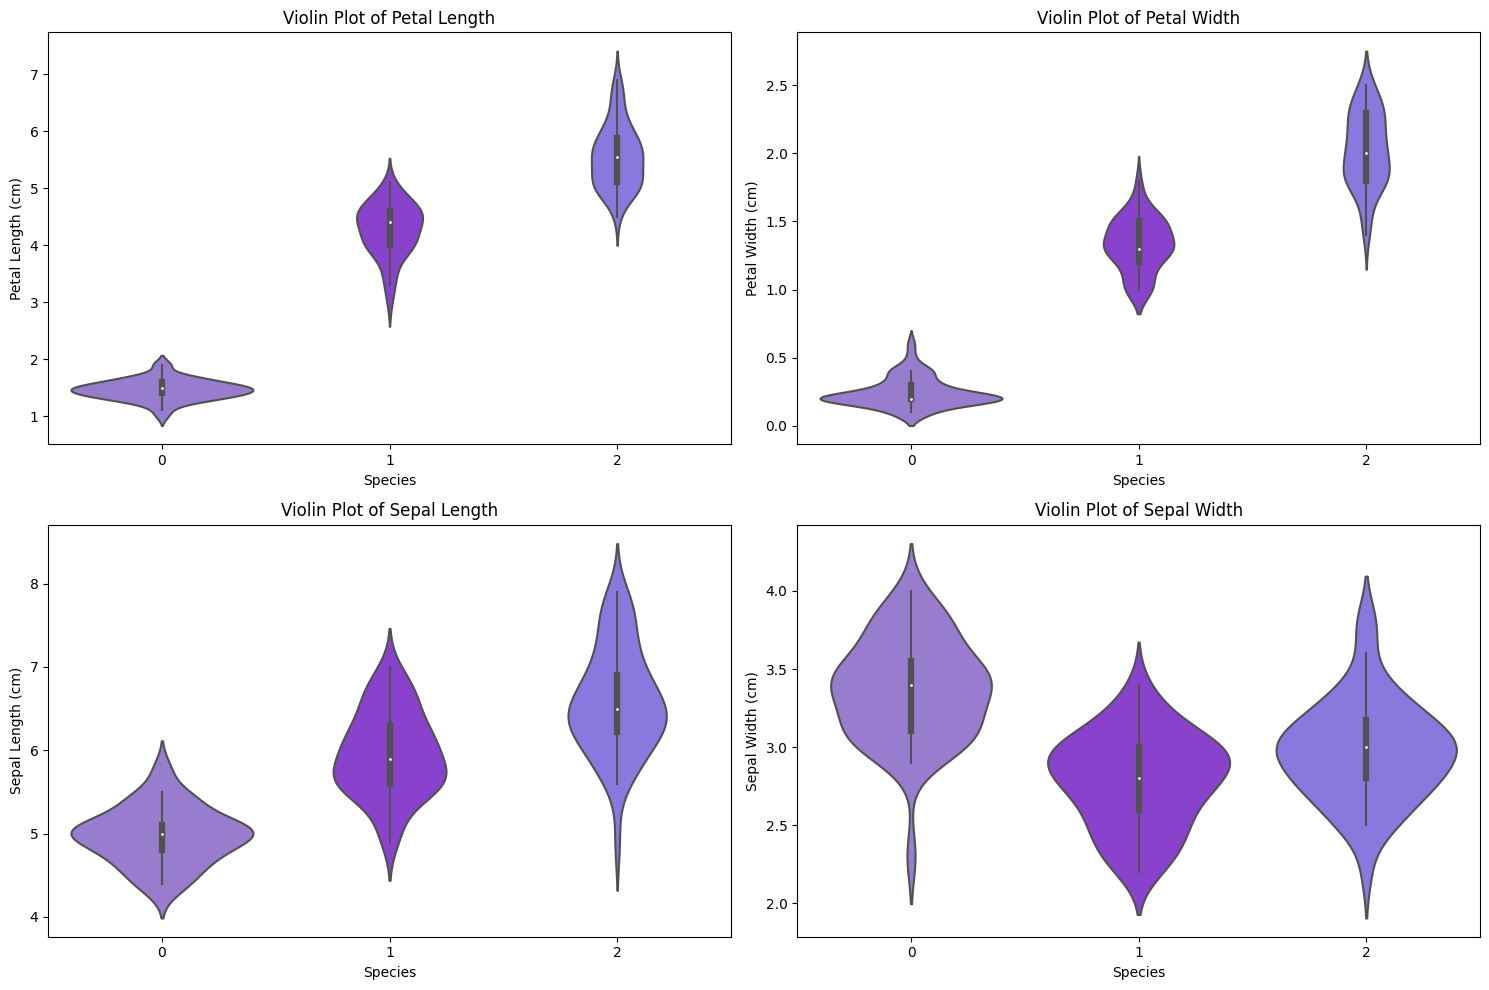

In [30]:
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD']  # Shades of purple

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='petal_length', data=df, palette=custom_palette)
plt.title('Violin Plot of Petal Length', fontsize=12)
plt.xlabel('Species', fontsize=10)
plt.ylabel('Petal Length (cm)', fontsize=10)

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='petal_width', data=df, palette=custom_palette)
plt.title('Violin Plot of Petal Width', fontsize=12)
plt.xlabel('Species', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='sepal_length', data=df, palette=custom_palette)
plt.title('Violin Plot of Sepal Length', fontsize=12)
plt.xlabel('Species', fontsize=10)
plt.ylabel('Sepal Length (cm)', fontsize=10)

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='sepal_width', data=df, palette=custom_palette)
plt.title('Violin Plot of Sepal Width', fontsize=12)
plt.xlabel('Species', fontsize=10)
plt.ylabel('Sepal Width (cm)', fontsize=10)

plt.tight_layout()
plt.show()

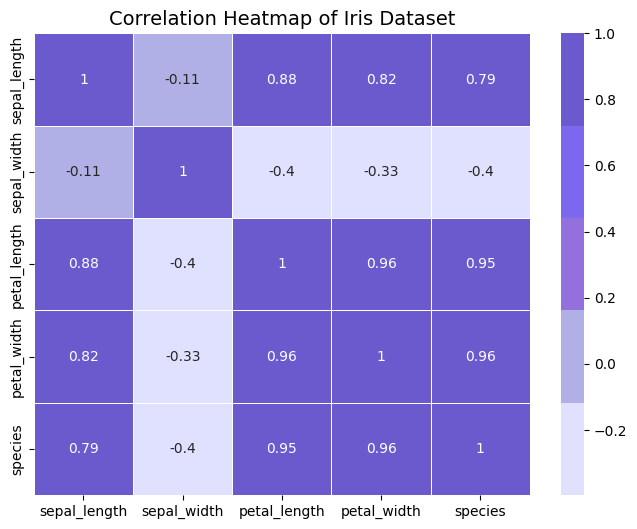

In [31]:

# Selecting only numeric columns
numeric_columns =df.select_dtypes(include=['float64', 'int64'])

# Define a custom palette with shades of purple
custom_palette = ['#E0E0FF', '#B0B0E6', '#9370DB', '#7B68EE', '#6A5ACD']  # Shades of purple

# Create correlation heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap=custom_palette, linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset', fontsize=14)
plt.show()



BIVARIATE ANALYSIS

Plotting the pair plot 

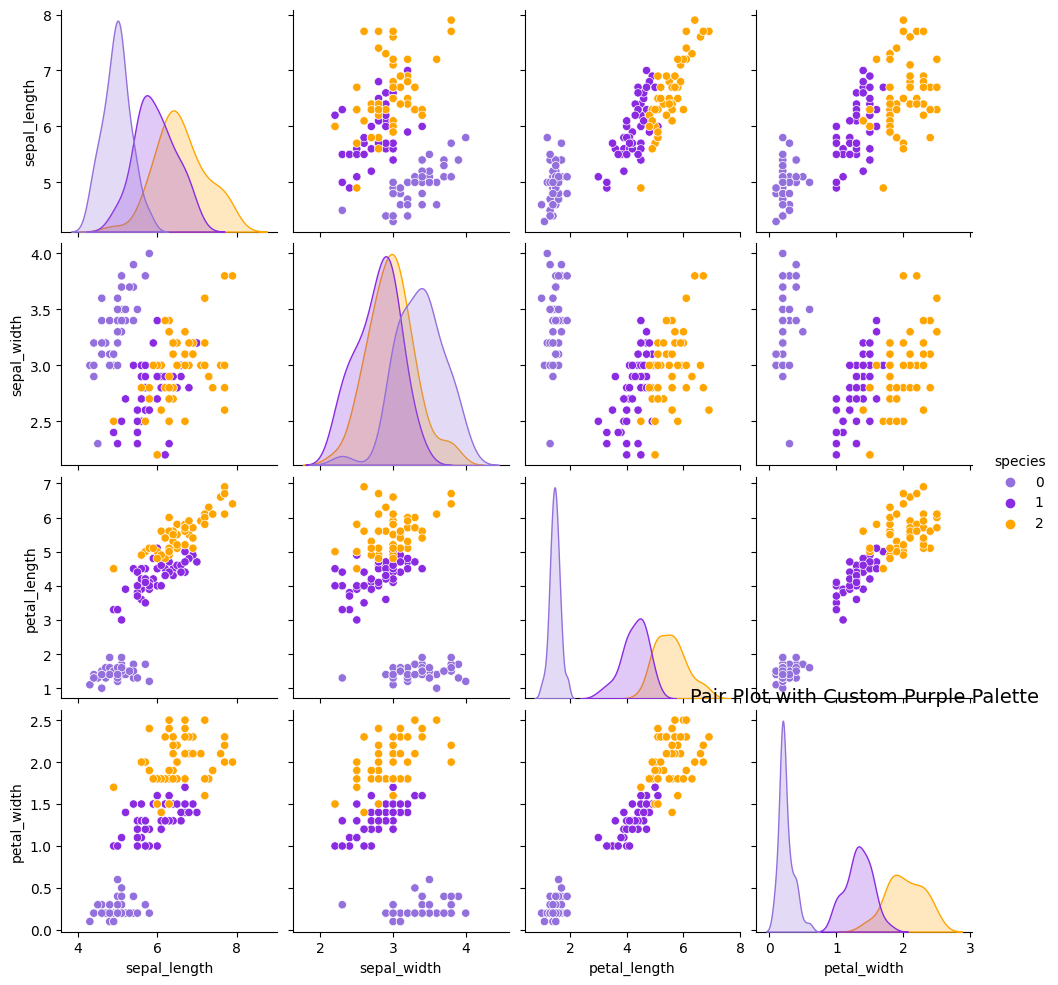

In [32]:
# Defining a custom palette with shades of purple and a contrasting color
custom_palette = ['#9370DB', '#8A2BE2','#FFA500']  # Purple shades + Orange as a contrast

# Plotting the pair plot with custom colors
sns.pairplot(df, hue='species', palette=custom_palette)

# Adjust plot parameters (if needed)
plt.title('Pair Plot with Custom Purple Palette', fontsize=14)
plt.show()


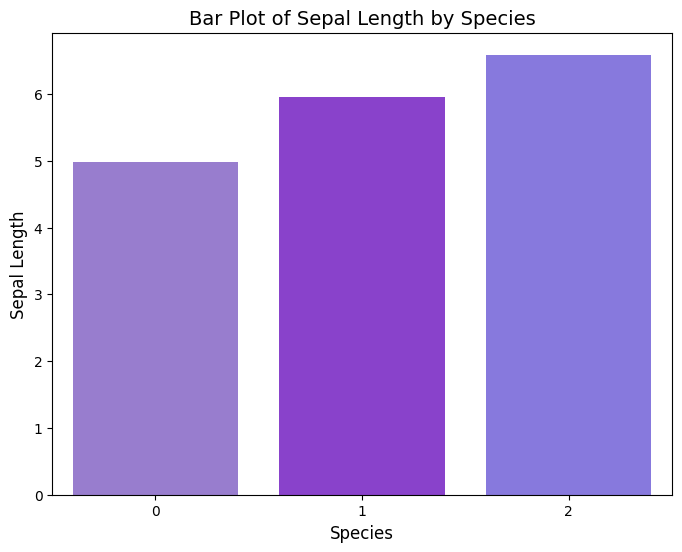

In [33]:
# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE']  # Purple shades

plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal_length', data=df, ci=None, palette=custom_palette)
plt.title('Bar Plot of Sepal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Sepal Length', fontsize=12)
plt.show()

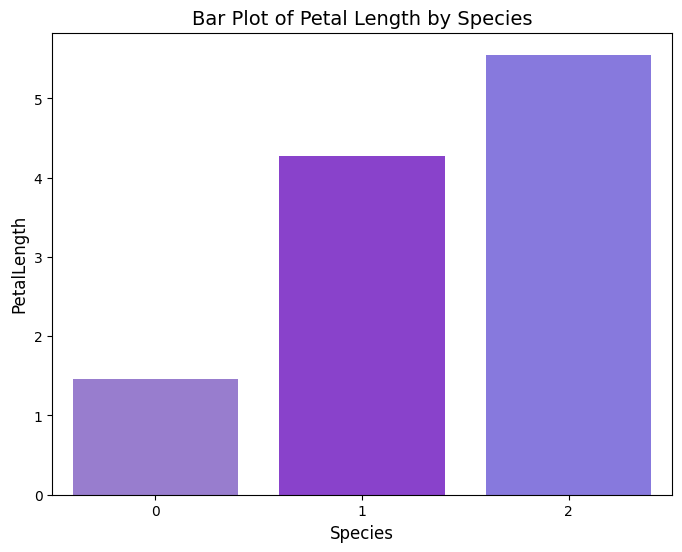

In [34]:
# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE']  # Purple shades

plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal_length', data=df, ci=None, palette=custom_palette)
plt.title('Bar Plot of Petal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('PetalLength', fontsize=12)
plt.show()

# STEP 6: TRAIN-TEST SPLIT

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.8 KB


In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
df.shape

(146, 5)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(116, 4)
(116,)
(30, 4)
(30,)


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 129 to 41
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  116 non-null    float64
 1   sepal_width   116 non-null    float64
 2   petal_length  116 non-null    float64
 3   petal_width   116 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


In [41]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,116.000000,116.000000,116.000000,116.000000
mean,5.829310,3.033621,3.792241,1.218103
std,0.846375,0.388742,1.771619,0.766993
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.400000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,3.900000,6.900000,2.500000


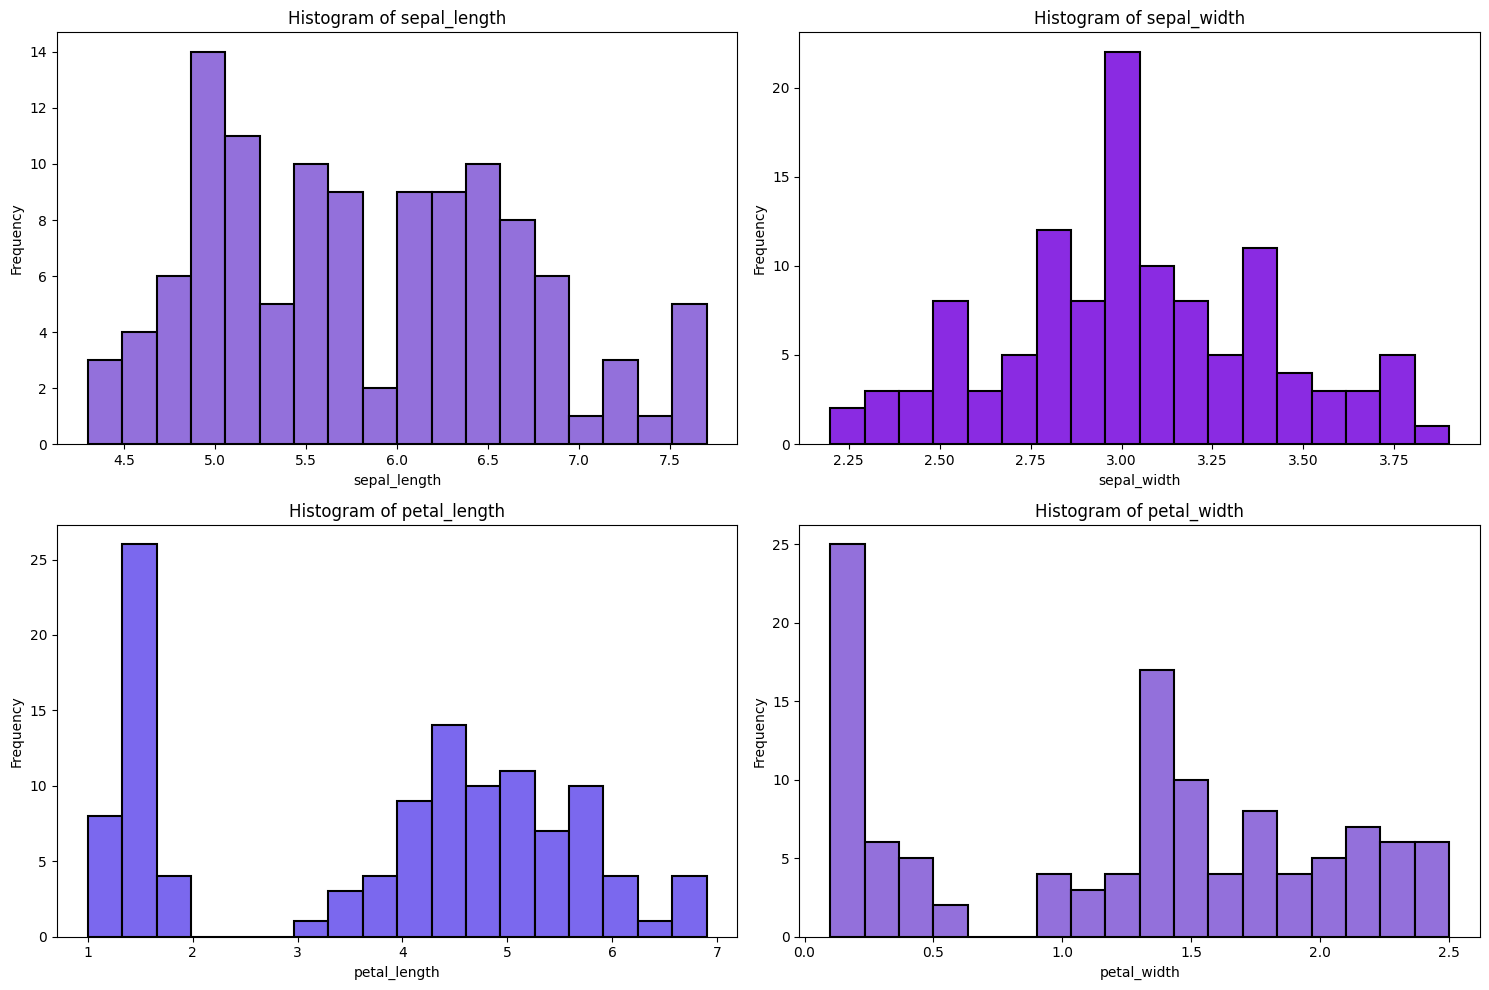

In [42]:
# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X_train.columns):
    plt.subplot(2, 2, i+1)  # Adjust subplot layout dynamically
    plt.hist(X_train[feature], bins=18, color=custom_palette[i % len(custom_palette)], edgecolor='black', linewidth=1.5)
    plt.title(f'Histogram of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjusting layout and labels
plt.tight_layout()
plt.show()

### Analysis of Boxplot Charts

The upper row of the boxplot chart below suggests that the distributions of Sepal Length and Sepal Width among different flowers are quite similar to each other. However, Iris-setosa stands out with the most extreme values for both features.

The bottom row reinforces our observation from the histograms above. The Iris-setosa flower exhibits distinct characteristics in Petal Length and Width compared to the other two flowers. Additionally, it is evident that Iris-setosa has a much narrower distribution (represented by shorter boxplots) in these features compared to Iris-versicolor and Iris-virginica, which have longer boxplots.

These findings imply that the Iris-setosa flower may be the easiest to classify due to its distinguishable features from the other two flowers. However, further analysis is needed to confirm this assumption.




# STEP 7: Model Creation

* 
The One-vs-Rest or (OVR), also called One-vs-All (OVA) strategy, fits a single classifier for each class that is fitted against all other classes. OVR is essentially is splitting the multi-class problem into a set of binary classification problems.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
logit_ovr = LogisticRegression(multi_class='multinomial')
logit_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [44]:

# predict
y_pred_ovr_train = logit_ovr.predict(X_train)
y_pred_ovr_test = logit_ovr.predict(X_test)

In [45]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred_ovr_train))
print()
print(confusion_matrix(y_test, y_pred_ovr_test))

[[38  0  0]
 [ 0 37  1]
 [ 0  2 38]]

[[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]


In [46]:

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_ovr_train))
print()
print(classification_report(y_test, y_pred_ovr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.97      0.96        38
           2       0.97      0.95      0.96        40

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_ovr_train))
print()
print(accuracy_score(y_test, y_pred_ovr_test))

0.9741379310344828

0.9333333333333333


In [48]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr, X_train, y_train, cv=10)
test_accuracy = cross_val_score(logit_ovr, X_test, y_test, cv=10)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())

Train Accuracy [1.         1.         1.         0.91666667 1.         1.
 1.         1.         0.90909091 0.90909091]

Train Mean Accuracy 0.9734848484848483

Train Max Accuracy 1.0

Test Accuracy [0.66666667 1.         0.66666667 1.         1.         0.66666667
 1.         0.66666667 1.         1.        ]

Test Mean Accuracy 0.8666666666666666

Test Max Accuracy 1.0



* Cross_validation_score is giving very good accuracy . We will continue to check the accuracy for different models.

* Now we will follow the same steps as above for training various machine learning algorithms.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics 

# 7.1  Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression()

In [51]:
y_pred_lr=LR.predict(X_test)

In [52]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_lr)

# Print the accuracy score
print('The accuracy of the Logistic Regression is:', accuracy)

The accuracy of the Logistic Regression is: 0.9333333333333333


# 7.2 Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
y_pred_dt = dt.predict(X_test)

In [55]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_dt)

# Print the accuracy score
print('The accuracy of the Decision Tree is:', accuracy)

The accuracy of the Decision Tree is: 0.9333333333333333


# 7.3 K- Nearest Neighbors (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred_knn = knn.predict(X_test)

In [58]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_knn)

# Print the accuracy score
print('The accuracy of the Decision Tree is:', accuracy)

The accuracy of the Decision Tree is: 0.9666666666666667


# 7.4 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 7.5 Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# STEP 8 : Model Selection

                       Model  Accuracy  Precision    Recall  F1 Score
4  K-Nearest Neighbors (KNN)  0.966667   0.969697  0.966667  0.966667
0        Logistic Regression  0.933333   0.944444  0.933333  0.933030
1             Decision Trees  0.933333   0.944444  0.933333  0.933030
2              Random Forest  0.933333   0.944444  0.933333  0.933030
5                        svm  0.933333   0.944444  0.933333  0.933030
3                Naive Bayes  0.900000   0.902727  0.900000  0.900000


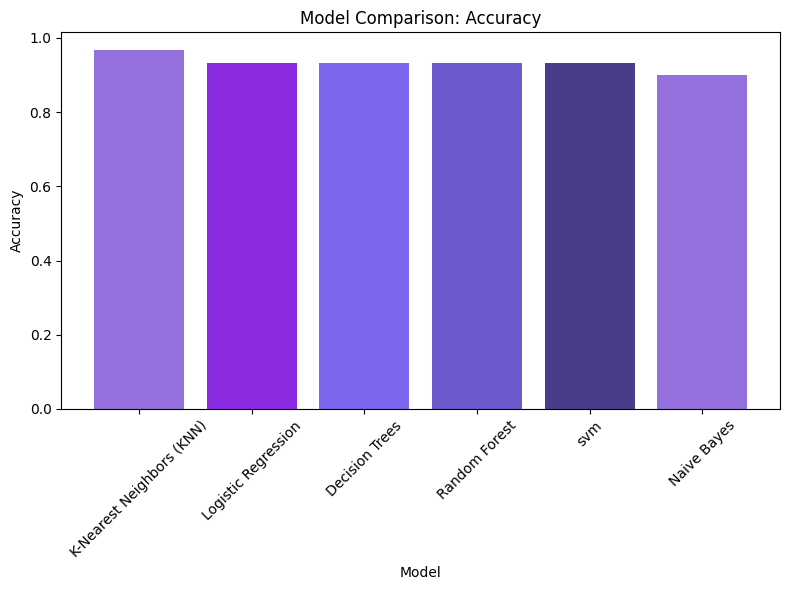

In [61]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize an empty DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B']

# Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_lr],
    'Precision': [precision_lr],
    'Recall': [recall_lr],
    'F1 Score': [f1_lr]
})], ignore_index=True)

# Decision Trees
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Decision Trees'],
    'Accuracy': [accuracy_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'F1 Score': [f1_dt]
})], ignore_index=True)

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1 Score': [f1_rf]
})], ignore_index=True)

# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Accuracy': [accuracy_nb],
    'Precision': [precision_nb],
    'Recall': [recall_nb],
    'F1 Score': [f1_nb]
})], ignore_index=True)

# K-Nearest Neighbors (KNN)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['K-Nearest Neighbors (KNN)'],
    'Accuracy': [accuracy_knn],
    'Precision': [precision_knn],
    'Recall': [recall_knn],
    'F1 Score': [f1_knn]
})], ignore_index=True)

# svm
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['svm'],
    'Accuracy': [accuracy_dt],
    'Precision': [precision_dt],
    'Recall': [recall_dt],
    'F1 Score': [f1_dt]
})], ignore_index=True)

# Sort the DataFrame by Accuracy
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of Accuracy scores with shades of purple
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color=custom_palette)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## The KNN Model has and accuracy of 96.67%

# STEP 9 :

Accuracy for various values of n for K-Nearest nerighbours

In [62]:
accuracy_scores = []

In [63]:

k_values = list(range(1, 11))

In [64]:
# Train and evaluate the KNN classifier for each K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    accuracy_scores.append(accuracy)

In [65]:
# Convert accuracy scores to a pandas Series
a = pd.Series(accuracy_scores, index=k_values)

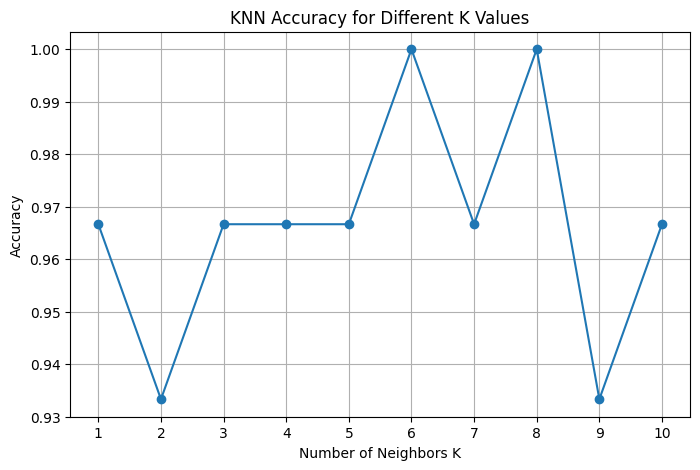

In [66]:
# Plot the accuracy scores
plt.figure(figsize=(8, 5))
plt.plot(a.index, a, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Creating Petals And Sepals Training Data

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.8 KB


In [68]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
# Subset for petal measurements
petal = df[['petal_length', 'petal_width', 'species']]

# Subset for sepal measurements
sepal = df[['sepal_length', 'sepal_width', 'species']]
    

In [70]:
from sklearn.model_selection import train_test_split

# Splitting data for petal dataset
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)

train_x_p = train_p[['petal_width', 'petal_length']]  # Corrected column selection
train_y_p = train_p['species']  # Corrected species selection

test_x_p = test_p[['petal_width', 'petal_length']]  # Corrected column selection
test_y_p = test_p['species']  # Corrected species selection

# Splitting data for sepal dataset
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)

train_x_s = train_s[['sepal_width', 'sepal_length']]  # Corrected column selection
train_y_s = train_s['species']  # Corrected species selection

test_x_s = test_s[['sepal_width', 'sepal_length']]  # Corrected column selection
test_y_s = test_s['species']  # Corrected species selection


#  9.1 Logistic Regression

In [71]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9772727272727273
The accuracy of the Logistic Regression using Sepals is: 0.8409090909090909


# 9.2 SVM

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming train_x_p, train_y_p, test_x_p, test_y_p are for Petal features
# Assuming train_x_s, train_y_s, test_x_s, test_y_s are for Sepal features

# SVM model using Petal features
model_p = SVC()
model_p.fit(train_x_p, train_y_p) 
prediction_p = model_p.predict(test_x_p) 
accuracy_p = accuracy_score(prediction_p, test_y_p)
print('The accuracy of the SVM using Petals is:', accuracy_p)

# SVM model using Sepal features
model_s = SVC()
model_s.fit(train_x_s, train_y_s) 
prediction_s = model_s.predict(test_x_s) 
accuracy_s = accuracy_score(prediction_s, test_y_s)
print('The accuracy of the SVM using Sepals is:', accuracy_s)


The accuracy of the SVM using Petals is: 0.9772727272727273
The accuracy of the SVM using Sepals is: 0.7954545454545454


# 9.3  Desicion Tree

In [73]:

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9772727272727273
The accuracy of the Decision Tree using Sepals is: 0.7045454545454546


# 9.4 K-Nearest Neighbors

In [74]:

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9772727272727273
The accuracy of the KNN using Sepals is: 0.7272727272727273


# 9.5 Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p) 
print('The accuracy of the Naive Bayes using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model = GaussianNB()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s) 
print('The accuracy of the Naive Bayes using Sepals is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the Naive Bayes using Petals is: 0.9772727272727273
The accuracy of the Naive Bayes using Sepals is: 0.7727272727272727


                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.977273   0.979021  0.977273  0.977361
1             Decision Trees  0.977273   0.979021  0.977273  0.977361
2              Random Forest  0.977273   0.979021  0.977273  0.977361
3                Naive Bayes  0.977273   0.979021  0.977273  0.977361
4  K-Nearest Neighbors (KNN)  0.977273   0.979021  0.977273  0.977361
5                        SVM  0.977273   0.979021  0.977273  0.977361


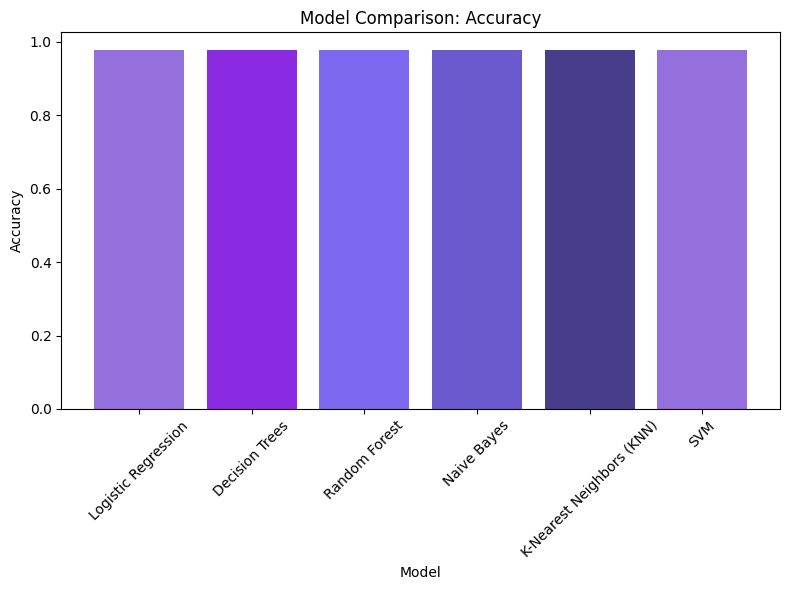

In [76]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Sample data loading (replace with your actual data loading code)
# Assuming train_x_p, test_x_p, train_y_p, test_y_p, train_x_s, test_x_s, train_y_s, test_y_s are defined
# For simplicity, I'm using placeholders for training and test data

# Initialize an empty DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B']

# Function to evaluate model and append results to model_comparison DataFrame
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_comparison.loc[len(model_comparison)] = [model_name, accuracy, precision, recall, f1]

# Example models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'SVM': SVC()
}

# Iterate over each model and evaluate
for model_name, model in models.items():
    if 'Logistic Regression' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)
    if 'Decision Trees' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)
    if 'Random Forest' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)
    if 'Naive Bayes' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)
    if 'K-Nearest Neighbors (KNN)' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)
    if 'SVM' in model_name:
        evaluate_model(model_name, model, train_x_p, train_y_p, test_x_p, test_y_p)

# Sort the DataFrame by Accuracy
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of Accuracy scores with shades of purple
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color=custom_palette)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                       Model  Accuracy  Precision    Recall  F1 Score
4  K-Nearest Neighbors (KNN)  0.863636   0.870130  0.863636  0.864336
0        Logistic Regression  0.840909   0.843357  0.840909  0.841525
5                        SVM  0.795455   0.790731  0.795455  0.792500
3                Naive Bayes  0.772727   0.765800  0.772727  0.768625
2              Random Forest  0.727273   0.741176  0.727273  0.717700
1             Decision Trees  0.681818   0.685065  0.681818  0.681702


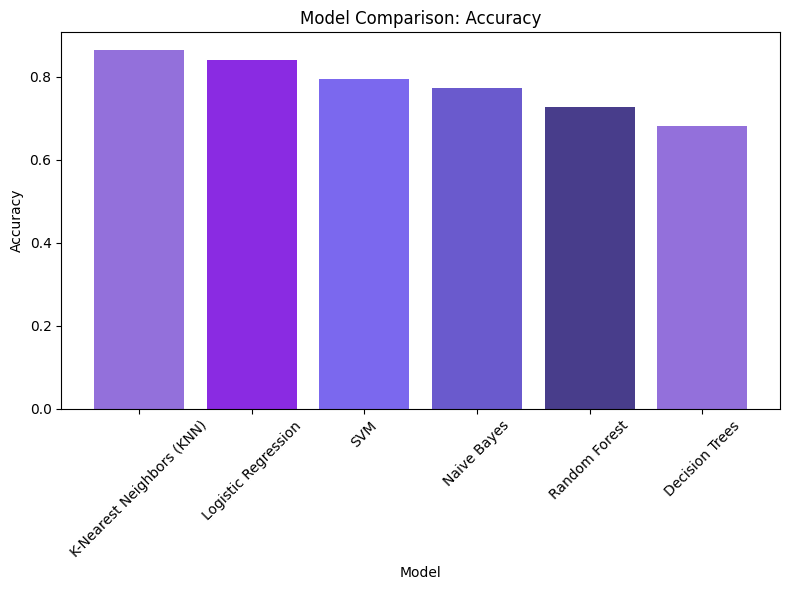

In [77]:
# Initialize an empty DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Define a custom palette with shades of purple
custom_palette = ['#9370DB', '#8A2BE2', '#7B68EE', '#6A5ACD', '#483D8B']

# Function to evaluate model and append results to model_comparison DataFrame
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_comparison.loc[len(model_comparison)] = [model_name, accuracy, precision, recall, f1]

# Example models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'SVM': SVC()
}

# Iterate over each model and evaluate
for model_name, model in models.items():
    if 'Logistic Regression' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)
    if 'Decision Trees' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)
    if 'Random Forest' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)
    if 'Naive Bayes' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)
    if 'K-Nearest Neighbors (KNN)' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)
    if 'SVM' in model_name:
        evaluate_model(model_name, model, train_x_s, train_y_s, test_x_s, test_y_s)

# Sort the DataFrame by Accuracy
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of Accuracy scores with shades of purple
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color=custom_palette)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Step 10: Conclusion
The  correlation between the Sepal Width and Length is very low whereas the correlation between Petal Width and Length is  very high.